In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [257]:
df = pd.read_csv('euromillions_Fusion.csv',sep=';', encoding='ISO-8859-1')

In [258]:
df.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,numï¿½ro_de_tirage_dans_le_cycle,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,...,nombre_de_gagnant_au_rang7_Etoile+,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_My_Million,numero_Tirage_Exceptionnel_Euro_Million
0,20244006,VENDREDI,19/01/2024,1,20/03/2024,50,27,28,48,44,...,10760,4,18046,"11,1",42691,"2,6",424081,"2,3",QE 911 6397,NaN
1,20244005,MARDI,16/01/2024,7,17/03/2024,18,21,33,45,10,...,8645,"4,4",13958,"12,7",39974,"2,5",328733,"2,7",CU 208 5890,NaN
2,20244004,VENDREDI,12/01/2024,6,13/03/2024,18,16,17,49,45,...,11446,"4,3",18344,"12,4",46653,"2,7",427062,"2,6",RT 208 4085,NaN
3,20244003,MARDI,09/01/2024,5,10/03/2024,12,9,2,39,40,...,9622,"3,8",15703,"10,8",41373,"2,3",339112,"2,4",LN 958 0675,NaN
4,20244002,VENDREDI,05/01/2024,4,06/03/2024,18,4,39,7,50,...,15613,"3,1",26334,"8,5",54128,"2,3",474691,"2,3",SA 454 2143,NaN


In [259]:
df.shape

(764, 75)

In [260]:
column_names = df.columns
column_names

Index(['annee_numero_de_tirage', 'jour_de_tirage', 'date_de_tirage',
       'numï¿½ro_de_tirage_dans_le_cycle', 'date_de_forclusion', 'boule_1',
       'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2',
       'boules_gagnantes_en_ordre_croissant',
       'etoiles_gagnantes_en_ordre_croissant',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_europe',
       'rapport_du_rang1_Euro_Millions',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_europe',
       'rapport_du_rang2_Euro_Millions',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_europe',
       'rapport_du_rang3_Euro_Millions',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_europe',
       'rapport_du_rang4_Euro_Millions',
       'nombre_de_gagnant_au_rang5_

In [261]:
df_ligth = df[['boule_1','boule_2','boule_3','boule_4','boule_5','etoile_1','etoile_2']]

In [262]:
test = df[['boules_gagnantes_en_ordre_croissant','etoiles_gagnantes_en_ordre_croissant']]

In [263]:
test.head(2)

,boules_gagnantes_en_ordre_croissant,etoiles_gagnantes_en_ordre_croissant
0,-27-28-44-48-50-,-7-12-
1,-10-18-21-33-45-,-8-12-


In [264]:
df_ligth.head()

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,50,27,28,48,44,7,12
1,18,21,33,45,10,12,8
2,18,16,17,49,45,9,12
3,12,9,2,39,40,3,1
4,18,4,39,7,50,8,3


In [265]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

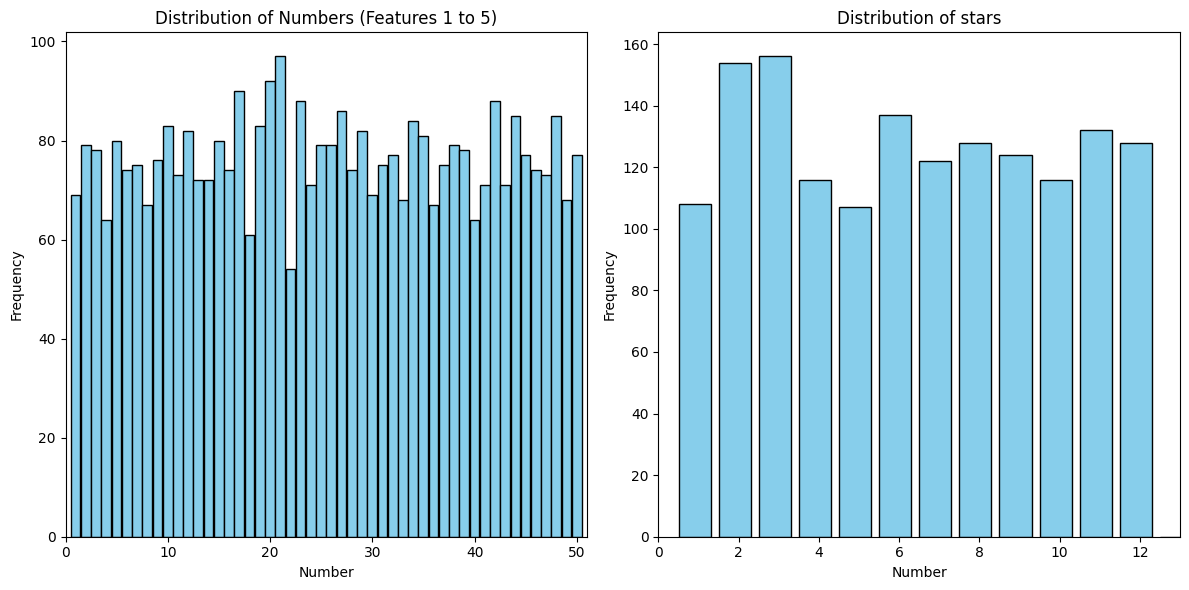

In [266]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bin_edges = [edge - 0.5 for edge in range(df_ligth.min().min(), df_ligth.max().max() + 2)]
# Histogram for features 1 to 5
axes[0].hist(df_ligth.iloc[:, :5].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.95)
axes[0].set_title('Distribution of Numbers (Features 1 to 5)')
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 51])

# Histogram for features 6 and 7
hist_2 = axes[1].hist(df_ligth.iloc[:, 5:].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
axes[1].set_title('Distribution of stars')
axes[1].set_xlabel('Number')
axes[1].set_ylabel('Frequency')

# Customize x-axis labels for the second subplot
# axes[1].set_xticks(hist_2[1])
# axes[1].set_xticklabels(hist_2[1])
axes[1].set_xlim([0, 13])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [267]:
# Select features 1 to 5
features_1_to_5 = df_ligth.iloc[:, :5]
# Check if at least one value in each row is less than 10
at_least_one_less_than_10 = (features_1_to_5 < 10).any(axis=1)

# Count the number of rows where at least one value is less than 10
count_rows_at_least_one_less_than_10 = at_least_one_less_than_10.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 10 appears numbers: {count_rows_at_least_one_less_than_10:.2f}%')

% of times a value < 10 appears numbers: 63.74%


In [268]:
# Check if at least one value in each row is less than 20
at_least_one_less_than_20 = ((features_1_to_5 >= 10) & (features_1_to_5 < 20)).any(axis=1)

# Count the number of rows where at least one value is less than 20
count_rows_at_least_one_less_than_20 = at_least_one_less_than_20.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 20 appears numbers: {count_rows_at_least_one_less_than_20:.2f}%')

% of times a value < 20 appears numbers: 70.68%


In [269]:
# Check if at least one value in each row is less than 30
at_least_one_less_than_30 = ((features_1_to_5 >= 20) & (features_1_to_5 < 30)).any(axis=1)

# Count the number of rows where at least one value is less than 30
count_rows_at_least_one_less_than_30 = at_least_one_less_than_30.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 30 appears numbers: {count_rows_at_least_one_less_than_30:.2f}%')

% of times a value < 30 appears numbers: 71.07%


In [270]:
# Check if at least one value in each row is less than 40
at_least_one_less_than_40 = ((features_1_to_5 >= 30) & (features_1_to_5 < 40)).any(axis=1)

# Count the number of rows where at least one value is less than 40
count_rows_at_least_one_less_than_40 = at_least_one_less_than_40.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 40 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value < 40 appears numbers: 69.50%


In [271]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_50 = ((features_1_to_5 >= 40) & (features_1_to_5 <= 50)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_40 = at_least_one_less_than_50.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 50 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value <= 50 appears numbers: 74.08%


In [272]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_25 = ((features_1_to_5 <= 25)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_25 = at_least_one_less_than_25.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 25 appears numbers: {count_rows_at_least_one_less_than_25:.2f}%')

% of times a value <= 25 appears numbers: 98.30%


In [273]:
Number50 = (features_1_to_5 == 50).any(axis=1)
Number50 = Number50.sum()/df_ligth.shape[0]*100
print(f'% 50: {Number50:.2f}%')

% 50: 10.08%


In [274]:
Number1 = (features_1_to_5 == 1).any(axis=1)
Number1 = Number1.sum()/df_ligth.shape[0]*100
print(f'% 1: {Number1:.2f}%')

% 1: 9.03%


In [275]:
# Count the number of values less than 24 for each row in features 1 to 5
count_less_than_25_per_row = (features_1_to_5 <= 25).sum(axis=1)

# Print the count for each row
print('Number of values less than 25 for each row:')
print(count_less_than_25_per_row)


Number of values less than 25 for each row:
0      0
1      3
2      3
3      3
4      3
      ..
759    4
760    3
761    3
762    1
763    3
Length: 764, dtype: int64


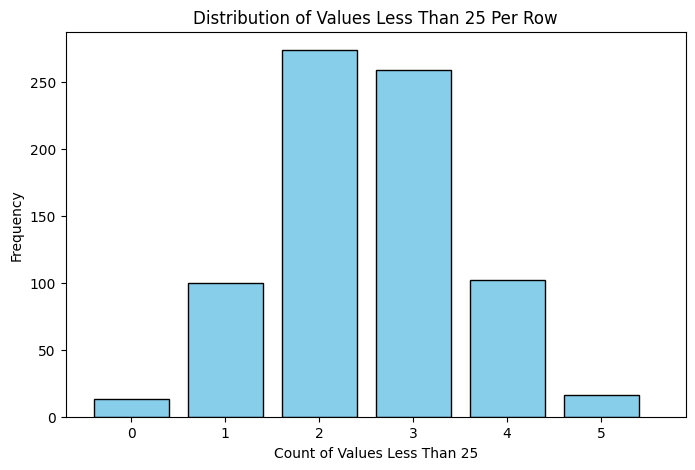

In [276]:
# Plot histogram
plt.figure(figsize=(8, 5))
bin_edges = [edge - 0.4 for edge in range(count_less_than_25_per_row.min(), count_less_than_25_per_row.max() + 2)]
plt.hist(count_less_than_25_per_row, bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
plt.title('Distribution of Values Less Than 25 Per Row')
plt.xlabel('Count of Values Less Than 25')
plt.ylabel('Frequency')
plt.xticks(range(6))
plt.show()

## Create Data with a windows

In [277]:
# frequency of a number in the last window rows
def count_frequency(dataframe, windows):
    df_ = dataframe.copy()
    for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    for col in ['etoile_1', 'etoile_2']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['etoile_1', 'etoile_2']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    return df_

In [278]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
762,35,44,17,37,43,10,2
763,41,6,13,39,9,2,12


In [279]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,50,27,28,48,44,7,12
1,18,21,33,45,10,12,8


In [280]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [281]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
762,18,21,33,45,10,12,8
763,50,27,28,48,44,7,12


In [282]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,41,6,13,39,9,2,12
1,35,44,17,37,43,10,2


In [283]:
df_extend = count_frequency(df_ligth, windows = 12)

In [284]:
df_extend.shape

(764, 14)

In [285]:
df_extend.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2
0,41,6,13,39,9,2,12,0,0,0,0,0,0,0
1,35,44,17,37,43,10,2,0,0,0,0,0,0,1


In [286]:
def quadra_dif(data):
  df_ = data.copy()
  columns_to_diff = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
  for i in range(0, df_.shape[0]):
    df_['sum_diff_r2'] = ((df_[columns_to_diff].diff(axis=1) ** 2).sum(axis=1)).astype(int)
  return df_

In [287]:
df_extend = quadra_dif(df_extend)

In [288]:
df_extend.head(3)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2,sum_diff_r2
0,41,6,13,39,9,2,12,0,0,0,0,0,0,0,2850
1,35,44,17,37,43,10,2,0,0,0,0,0,0,1,1246
2,4,38,7,14,34,4,11,0,0,0,0,0,0,0,2566


In [289]:
# How long the number didn't not appear
def no_star(data):
  df_ = data.copy()
  for num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    mask = ((df_['etoile_1'] == num) | (df_['etoile_2'] == num))
    df_[f'no_s{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
    # df_[f'no_{num}'] = df_[f'no_{num}'].shift(fill_value=0).astype(int)
  return df_

def no_ball(data):
  df_ = data.copy()
  for num in range(51):
    mask = ((df_['boule_1'] == num) | (df_['boule_2'] == num) | (df_['boule_3'] == num) | (df_['boule_4'] == num) | (df_['boule_5'] == num))
    df_[f'no_b{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
  return df_

In [290]:
df_extend = no_ball(df_extend)

In [291]:
df_extend.head(3)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,...,no_b41,no_b42,no_b43,no_b44,no_b45,no_b46,no_b47,no_b48,no_b49,no_b50
0,41,6,13,39,9,2,12,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1,35,44,17,37,43,10,2,0,0,0,...,1,2,0,0,2,2,2,2,2,2
2,4,38,7,14,34,4,11,0,0,0,...,2,3,1,1,3,3,3,3,3,3


In [292]:
df_extend = no_star(df_extend)

In [293]:
df_extend.head(5)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,...,no_s3,no_s4,no_s5,no_s6,no_s7,no_s8,no_s9,no_s10,no_s11,no_s12
0,41,6,13,39,9,2,12,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,35,44,17,37,43,10,2,0,0,0,...,2,2,2,2,2,2,2,0,2,1
2,4,38,7,14,34,4,11,0,0,0,...,3,0,3,3,3,3,3,1,0,2
3,12,30,27,20,2,11,9,0,0,0,...,4,1,4,4,4,4,0,2,0,3
4,12,37,20,24,5,4,11,1,1,1,...,5,0,5,5,5,5,1,3,0,4


In [294]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 0:7])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = 12

# Create sequences for X and y
X, y = create_sequences(df_extend, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (752, 12, 78)
y shape: (752, 7)


In [295]:
print(X[-1])

[[  48   30   50   42   17    4    8    2    2    4    1    0    1    2
  1413  752   27    6   22    1   11    1   11    9   20    2    9    3
     7    2    4    3    0   13    5    1    8   17   21    1    1    6
     3   14    4    0   10   20    3    5   12    7   28    2    4   11
    16    0   17    3   14    5    5    0   12    0    4    5    5    0
     1   13    3    0    1    9   24    2]
 [  43   39   28   37    6    9   12    0    3    0    0    1    3    2
  1179  753   28    7   23    2   12    0   12   10   21    3   10    4
     8    3    5    4    1   14    6    2    9   18   22    2    2    7
     4    0    5    1   11   21    4    6   13    8    0    3    0   12
    17    1    0    4   15    6    6    1   13    1    5    6    6    1
     2   14    4    1    0   10   25    0]
 [   2   13   37   38   48    9    5    1    1    1    2    2    4    3
   798  754   29    0   24    3   13    1   13   11   22    4   11    5
     0    4    6    5    2   15    7    3   10   1

In [296]:
print(y[-1])

[50 27 28 48 44  7 12]


In [297]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, shuffle=False)

In [298]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (714, 12, 78) X_test: (38, 12, 78)
y_train: (714, 7) y_test: (38, 7)


##Model: TSLM

In [299]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, nb_label, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=False))
    # Output layer
    model.add(Dense(units=nb_label))

    return model

In [300]:
def adapt_learning_rate(epoch):
    if epoch < 500:
      return 0.0005
    elif epoch < 1000:
      return 0.0001
    else:
      return 0.00005

my_lr_scheduler = LearningRateScheduler(adapt_learning_rate)

In [301]:
units = 1024
window_length = rows_windows
nb_feature = X_train.shape[2]
nb_label = y.shape[1]
DROPOUT = 0.2
BATCHSIZE = 64
EPOCHS = 1000
OPTIMIZER  = Adam(learning_rate=0.0002)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [302]:
model = my_LSTM(units, window_length, nb_feature, nb_label, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 12, 1024)          4517888   
                                                                 
 dropout_19 (Dropout)        (None, 12, 1024)          0         
                                                                 
 lstm_26 (LSTM)              (None, 12, 1024)          8392704   
                                                                 
 dropout_20 (Dropout)        (None, 12, 1024)          0         
                                                                 
 lstm_27 (LSTM)              (None, 12, 1024)          8392704   
                                                                 
 dropout_21 (Dropout)        (None, 12, 1024)          0         
                                                                 
 lstm_28 (LSTM)              (None, 1024)             

In [303]:
# # Define early stopping

early_stop = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

In [304]:
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
# model.save('test'+'.h5')

In [305]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
model.save(f'test_valid_test_{units}_{BATCHSIZE}_{window_length}_{DROPOUT}'+'.h5')

Epoch 1/1500
12/12 [==============================] - 7s 63ms/step - loss: 604.6686 - accuracy: 0.1793
Epoch 2/1500
12/12 [==============================] - 1s 55ms/step - loss: 261.9189 - accuracy: 0.1975
Epoch 3/1500
12/12 [==============================] - 1s 56ms/step - loss: 176.1951 - accuracy: 0.2017
Epoch 4/1500
12/12 [==============================] - 1s 54ms/step - loss: 180.0921 - accuracy: 0.1961
Epoch 5/1500
12/12 [==============================] - 1s 54ms/step - loss: 169.3213 - accuracy: 0.1933
Epoch 6/1500
12/12 [==============================] - 1s 54ms/step - loss: 166.3319 - accuracy: 0.1891
Epoch 7/1500
12/12 [==============================] - 1s 54ms/step - loss: 172.6525 - accuracy: 0.2059
Epoch 8/1500
12/12 [==============================] - 1s 54ms/step - loss: 168.8497 - accuracy: 0.2045
Epoch 9/1500
12/12 [==============================] - 1s 54ms/step - loss: 174.7414 - accuracy: 0.1961
Epoch 10/1500
12/12 [==============================] - 1s 54ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


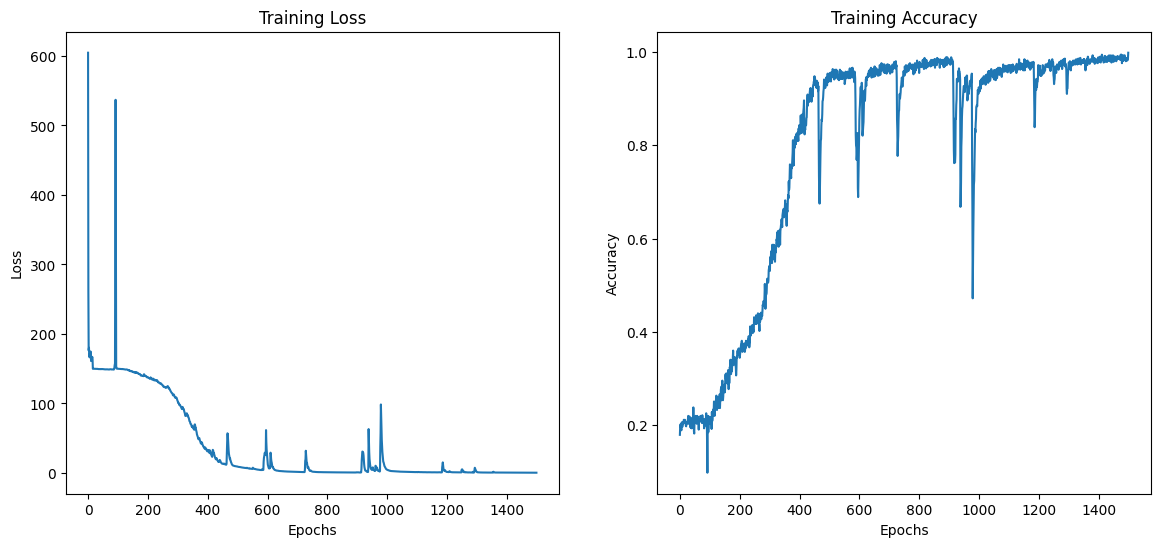

In [306]:
# Plotting the training and validation loss
# plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(history.history['loss'], label='Loss')
# axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

# plot 2
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.show()

In [307]:
predictions = model.predict(X_test)

2/2 [==============================] - 1s 9ms/step


In [189]:
# for idx in range(0, y_test.shape[0]):
#   predicted = np.round(predictions[idx]).astype(int)
#   print(f'row {idx}:----------------------------------------------------------','\ny_pred', predicted, '\ny_test', y_test[idx], '\nvalid ',np.isin(np.round(predictions[idx,:5]).astype(int), y_test[idx,:5]), np.isin(np.round(predictions[idx,-2:]).astype(int), y_test[idx,-2:]))

In [308]:
def post_traitement(predic):
    predicted = []
    for idx in range(y_test.shape[0]):
        array = np.clip(np.round(predic[idx]).astype(int), 1, 50)

        unique_values, counts = np.unique(array[:5], return_counts=True)
        duplicates_exist = any(counts > 1)
        unique_star, counts_s = np.unique(array[-2:], return_counts=True)
        duplicates_star = any(counts_s > 1)

        if duplicates_exist:
            duplicate_indices = np.where(np.isin(array[:5], unique_values[counts > 1]))[0]
            val0 = (predic[idx][duplicate_indices[0]] - array[duplicate_indices[0]])**2
            val1 = (predic[idx][duplicate_indices[1]] - array[duplicate_indices[1]])**2

            # Update array based on minimizing squared differences
            if val0 < val1:
                array[duplicate_indices[1]] += 1 if (predic[idx][1] > array[duplicate_indices[1]] and ((array[duplicate_indices[1]] + 1) not in array[:5])) else -1
            else:
                array[duplicate_indices[0]] += 1 if (predic[idx][0] > array[duplicate_indices[0]] and ((array[duplicate_indices[0]] + 1) not in array[:5])) else -1

        if duplicates_star:
            star_indices = np.where(np.isin(array[-2:], unique_star[counts_s > 1]))[0]
            star0 = (predic[idx][star_indices[0]] - array[star_indices[0]])**2
            star1 = (predic[idx][star_indices[1]] - array[star_indices[1]])**2

            # Update array based on minimizing squared differences
            if star0 < star1:
                array[star_indices[1]+5] += 1 if predic[idx][1] > array[star_indices[1]+5] else -1
            else:
                array[star_indices[0]+5] += 1 if predic[idx][0] > array[star_indices[0]+5] else -1

        #Printing results for test
        print(f'row {idx}:----------------------------------------------------------','\ny_pred', array, '\ny_test', y_test[idx], '\nvalid ',np.isin(array[:5], y_test[idx,:5]), np.isin(array[-2:], y_test[idx,-2:]))
        # Append the processed array to the predicted list
        predicted.append(array)

    return predicted

In [309]:
predictions[7]

array([36.913666 , 42.190895 , 19.757318 ,  6.6735497, 43.746452 ,
       11.06447  ,  6.030843 ], dtype=float32)

In [310]:
prediction_test = post_traitement(predictions)

row 0:---------------------------------------------------------- 
y_pred [33 22  9 19 27  4  3] 
y_test [14  5 42 36 40 11  2] 
valid  [False False False False False] [False False]
row 1:---------------------------------------------------------- 
y_pred [41 29 13 24 28  5  3] 
y_test [21 45 12 48 14  8 11] 
valid  [False False False False False] [False False]
row 2:---------------------------------------------------------- 
y_pred [43 35  4 22 28  8  5] 
y_test [10 31 41 15 42  2  5] 
valid  [False False False False False] [False  True]
row 3:---------------------------------------------------------- 
y_pred [40 39  1 23 27  5  6] 
y_test [ 3 23 35 34 24  8  5] 
valid  [False False False  True False] [ True False]
row 4:---------------------------------------------------------- 
y_pred [42 29  2 28 30  4  5] 
y_test [14  6 23  2 19  5  7] 
valid  [False False  True False False] [False  True]
row 5:---------------------------------------------------------- 
y_pred [48 35  1 24 23  6  7]